In [100]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
seed = 42

In [101]:
data = pd.read_csv("datass/dataset.csv")

In [102]:
data = data[(data['Education_Level'] != 'Unknown') 
            & (data['Income_Category'] != 'Unknown') 
            & (data['Marital_Status'] != 'Unknown')]


In [103]:
variables_to_keep = [
    'Gender',
    'Income_Category',
    'Marital_Status',
    'Education_Level',
    'Attrition_Flag'
]
data_subset = data.loc[:, variables_to_keep]


In [104]:
# Conversione delle variabili categoriche in tipo "category"
data_subset['Gender'] = data_subset['Gender'].astype('category')
data_subset['Income_Category'] = data_subset['Income_Category'].astype('category')
data_subset['Marital_Status'] = data_subset['Marital_Status'].astype('category')
data_subset['Education_Level'] = data_subset['Education_Level'].astype('category')
data_subset['Attrition_Flag'] = data_subset['Attrition_Flag'].astype('category')

# Stampa dei tipi di dati delle colonne nel dataset
print(data_subset.dtypes)

Gender             category
Income_Category    category
Marital_Status     category
Education_Level    category
Attrition_Flag     category
dtype: object


In [105]:
data_subset.shape

(7081, 5)

In [106]:
data_subset = data_subset[data_subset['Attrition_Flag'] != 'Existing Customer']
df = data_subset.drop(['Attrition_Flag'], axis = 1)
df_att = pd.DataFrame()
# Creazione di un oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle categorie in numeri
df['Gender'] = label_encoder.fit_transform(data_subset['Gender'])
df['Income_Category'] = label_encoder.fit_transform(data_subset['Income_Category'])
df['Marital_Status'] = label_encoder.fit_transform(data_subset['Marital_Status'])
df['Education_Level'] = label_encoder.fit_transform(data_subset['Education_Level'])
print(df.dtypes)

Gender             int32
Income_Category    int32
Marital_Status     int32
Education_Level    int32
dtype: object


In [107]:
df.shape

(1113, 4)

In [108]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Stampa i centroidi dei cluster
print(kmeans.cluster_centers_)

[[0.70967742 1.08211144 1.35483871 1.97067449]
 [0.3203125  3.71484375 1.35742187 1.83203125]
 [0.50384615 2.62307692 1.36923077 4.71538462]]


In [109]:
import warnings
warnings.filterwarnings("ignore")

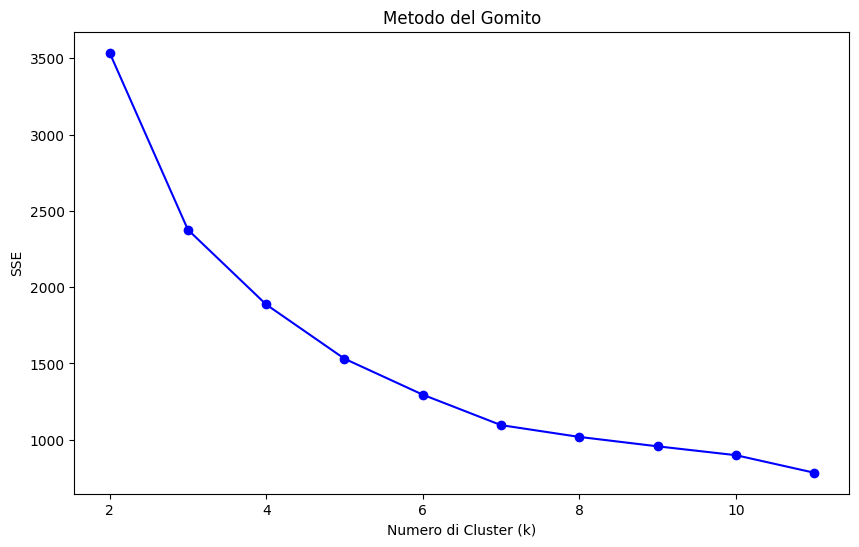

In [110]:
sse = []
k_values = range(2, 12)  # valori di k da testare

# Esegui il k-means clustering per vari valori di k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)  # SSE

# Visualizza la curva del metodo del gomito
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('SSE')
plt.title('Metodo del Gomito')
plt.show()


In [134]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
labels = kmeans.labels_
data_subset['Cluster_Labels'] = labels

<Figure size 800x600 with 0 Axes>

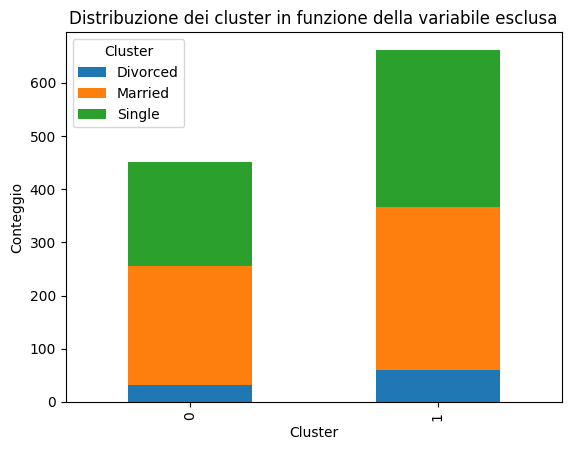

In [135]:
plt.figure(figsize=(8, 6))
ax = data_subset.groupby('Cluster_Labels')['Marital_Status'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Conteggio')
plt.title('Distribuzione dei cluster in funzione della variabile esclusa')
plt.legend(title='Cluster')

plt.show()

<Figure size 800x600 with 0 Axes>

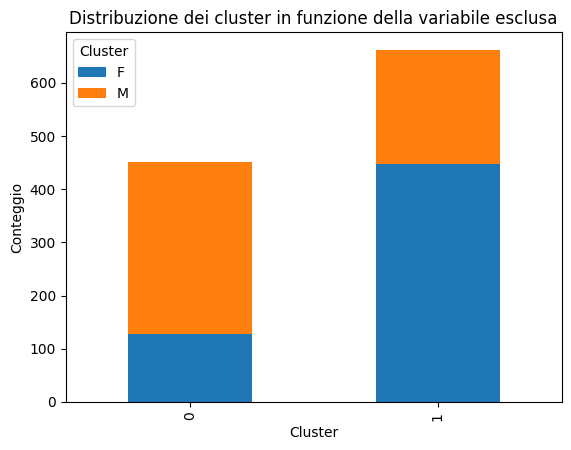

In [136]:
plt.figure(figsize=(8, 6))
ax = data_subset.groupby('Cluster_Labels')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Conteggio')
plt.title('Distribuzione dei cluster in funzione della variabile esclusa')
plt.legend(title='Cluster')

plt.show()

<Figure size 800x600 with 0 Axes>

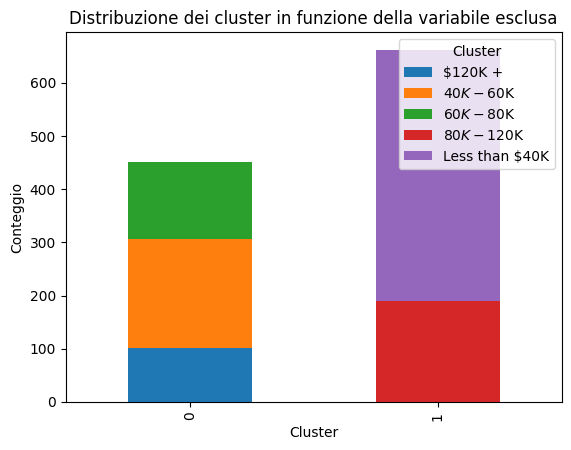

In [137]:
plt.figure(figsize=(8, 6))
ax = data_subset.groupby('Cluster_Labels')['Income_Category'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Conteggio')
plt.title('Distribuzione dei cluster in funzione della variabile esclusa')
plt.legend(title='Cluster')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


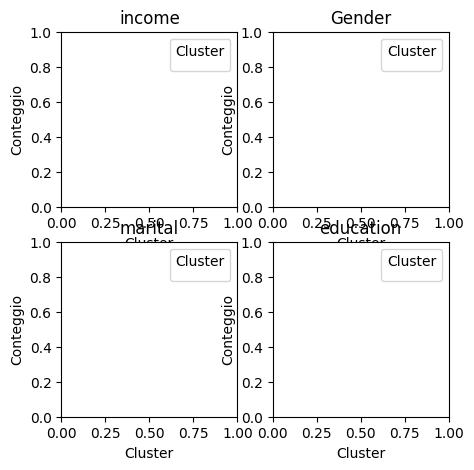

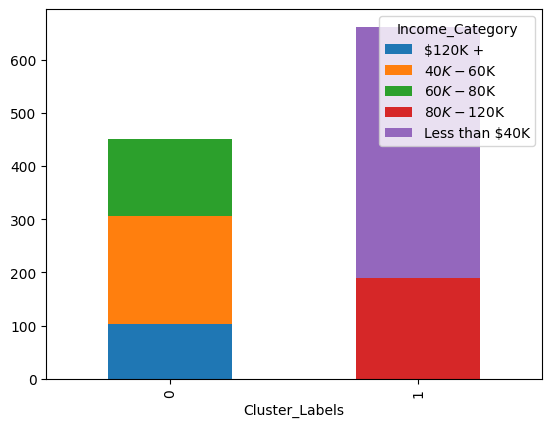

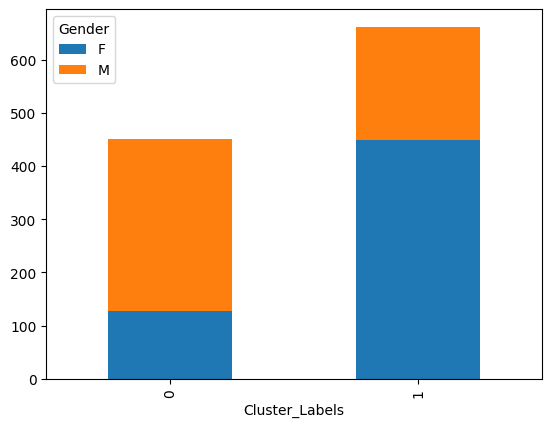

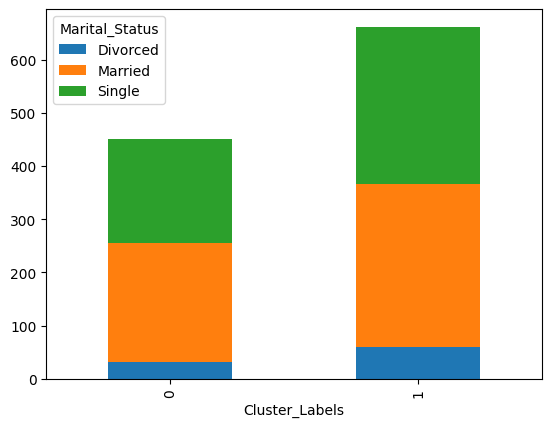

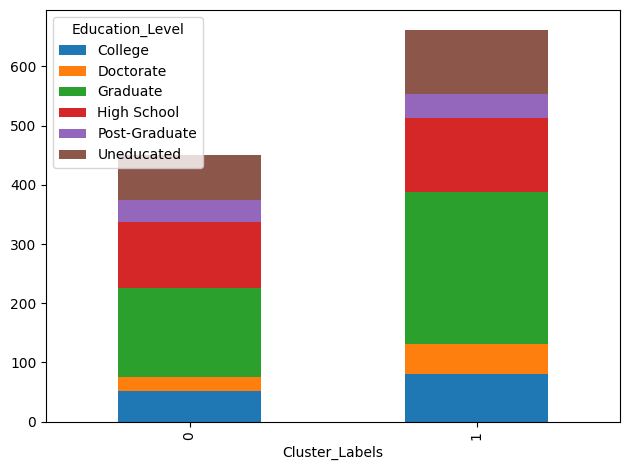

In [139]:
import matplotlib.pyplot as plt

# Crea una griglia di subplot 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

# Grafico 1
ax1 = axes[0, 0]
data_subset.groupby('Cluster_Labels')['Income_Category'].value_counts().unstack().plot(kind='bar', stacked=True)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Conteggio')
ax1.set_title('income')
ax1.legend(title='Cluster')

# Grafico 2
ax2 = axes[0, 1]
data_subset.groupby('Cluster_Labels')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Conteggio')
ax2.set_title('Gender')
ax2.legend(title='Cluster')

# Grafico 3
ax3 = axes[1, 0]
data_subset.groupby('Cluster_Labels')['Marital_Status'].value_counts().unstack().plot(kind='bar', stacked=True)
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Conteggio')
ax3.set_title('marital')
ax3.legend(title='Cluster')

# Grafico 4
ax4 = axes[1, 1]
data_subset.groupby('Cluster_Labels')['Education_Level'].value_counts().unstack().plot(kind='bar', stacked=True)
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Conteggio')
ax4.set_title('education')
ax4.legend(title='Cluster')

# Aggiusta la disposizione dei subplot
plt.tight_layout()

# Mostra la figura
plt.show()